This document was used to load in benchmarking data from Ran and Ran+Opt simulation and generate plots

Use qsp_main6

In [1]:
import numpy as np
import matplotlib as plt

In [2]:
def make_plots(names, bond_dims, selected_data, selected_functions, save_name, title,y_tick_low=17,y_tick_high=2,legend=True,loc1='upper right',loc2='upper right'):
    # Configure Matplotlib to use LaTeX for all text and larger font sizes
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "axes.labelsize": 28,
        "axes.titlesize": 28,
        "xtick.labelsize": 28,
        "ytick.labelsize": 28,
        "legend.fontsize": 22,
        "legend.title_fontsize": 22,
    })

    fig, axes = plt.subplots(1, 2, figsize=(12, 8))  # Adjust figsize as needed

    ax1 = axes[0]

    # Define the domain for the functions
    x = np.linspace(-1, 1, 1000)

    # Use a colormap for distinct colors
    cmap = plt.get_cmap('inferno')
    num_funcs = len(selected_functions)
    
    for idx, func in enumerate(selected_functions):
        y = func(x)
        
        # Normalize the function to have a maximum absolute value of 1
        y_norm = y / np.max(np.abs(y))
        
        # Use a different color for each line
        ax1.plot(x, y_norm, linewidth=2, color=cmap(idx / num_funcs), label=names[idx])
        
    ax1.set_xlabel(r'$x$', fontsize=28)
    ax1.set_ylabel(r'$f(x)$', fontsize=28)
    ax1.set_title(rf'\textbf{{{title}}}', fontsize=28)
    ax1.tick_params(axis='both', which='major', labelsize=28)
    ax1.grid(True, which="both", ls="--", alpha=0.6)

    # Add a legend
    if(legend):
        ax1.legend(loc=loc1, fontsize=22)

    # -----------------------------
    # Plot 2: Log of Infidelity vs Bond Dimension
    # -----------------------------
    ax2 = axes[1]

    i = 0
    # Iterate over data entries and corresponding names
    for data_entry in selected_data:
        # Extract fidelity values for the specified bond dimensions
        fidelities = [data_entry.get(dim, np.nan) for dim in bond_dims]
        
        # Compute infidelity; handle cases where fidelity might be 1 to avoid log(0)
        infidelities = [1 - f if f < 1 else 1e-17 for f in fidelities]
        
        # Round infidelities below 5e-14 to 1e-16
        infidelities = [v if v >= 5e-14 else 1e-16 for v in infidelities]
        
        # Plot infidelity vs bond dimension with distinct markers and label
        ax2.plot(bond_dims, infidelities, marker='o', linestyle='-', linewidth=2, 
                 color=cmap(i / len(selected_data)), label=rf'{names[i]}')
        i += 1

    ax2.set_xlabel(r'Bond Dimension ($\chi$)', fontsize=28)
    ax2.set_ylabel(r'Truncation Error ($\epsilon_T$)', fontsize=28)
    ax2.set_title(r'\textbf{Truncation Error vs Bond Dimension}', fontsize=28)

    # Set y-axis to logarithmic scale
    ax2.set_yscale('log')

    # Define y-ticks from 10^-2 to 10^-16
    y_ticks = [10**-i for i in range(y_tick_high, y_tick_low, 2)]
    ax2.set_yticks(y_ticks)

    # Set y-tick labels to display as LaTeX formatted strings
    y_tick_labels = [rf'$10^{{-{i}}}$' for i in range(y_tick_high, y_tick_low, 2)]
    ax2.set_yticklabels(y_tick_labels)

    ax2.set_xticks(bond_dims)
    ax2.tick_params(axis='both', which='major', labelsize=28)
    ax2.grid(True, which="both", ls="--", alpha=0.6)

    # Add legend to Plot 2
    if(legend):
        ax2.legend(fontsize=22, title_fontsize=22, loc=loc2)

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=2)

    # Save the figure with LaTeX-rendered text
    plt.savefig(
        rf"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\MPS Truncation Error\{save_name}",
        dpi=300,
        transparent=True,
        bbox_inches='tight'
    )

    # Display the plots
    plt.show()

    # Reset rcParams to default to avoid affecting other plots
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "sans-serif",
        "font.serif": ["DejaVu Sans"],
        "axes.labelsize": 10,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "legend.title_fontsize": 10,
    })


In [3]:
def generate_plot(x_vals, y_vals, titles, save_name, names=None, legend=False,y_tick_low=17, y_tick_high=2,loc1='upper right',loc2='upper right'):

    '''
    x_vals: a list
    y_vals: a list of N lists (i.e. N different y plots sharing the same x_vals)
    titles: ['image title', 'x-axis title', 'y axis title']
    save_name: string
    optional - names: a list of N strings naming each y plot
    optional - legend: display the legend of names
    
    '''
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "axes.labelsize": 28,
        "axes.titlesize": 28,
        "xtick.labelsize": 28,
        "ytick.labelsize": 28,
        "legend.fontsize": 22,
        "legend.title_fontsize": 22,
    })

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Adjust figsize as needed

    ax1 = axes[0]

    # Define the domain for the functions
    x = np.linspace(-1, 1, 1000)

    # Use a colormap for distinct colors
    cmap = plt.get_cmap('inferno')
    num_funcs = len(selected_functions)
    
    for idx, func in enumerate(selected_functions):
        y = func(x)
        
        # Normalize the function to have a maximum absolute value of 1
        y_norm = y / np.max(np.abs(y))
        
        # Use a different color for each line
        ax1.plot(x, y_norm, linewidth=2, color=cmap(idx / num_funcs), label=names[idx])
        
    ax1.set_xlabel(r'$x$', fontsize=28)
    ax1.set_ylabel(r'$f(x)$', fontsize=28)
    ax1.set_title(rf'\textbf{{{title}}}', fontsize=28)
    ax1.tick_params(axis='both', which='major', labelsize=28)
    ax1.grid(True, which="both", ls="--", alpha=0.6)

    # Add a legend
    if(legend):
        ax1.legend(loc=loc1, fontsize=22)

    # -----------------------------
    # Plot 2: Log of Infidelity vs Bond Dimension
    # -----------------------------
    ax2 = axes[1]

    i = 0
    # Iterate over data entries and corresponding names
    for data_entry in selected_data:
        # Extract fidelity values for the specified bond dimensions
        fidelities = [data_entry.get(dim, np.nan) for dim in bond_dims]
        
        # Compute infidelity; handle cases where fidelity might be 1 to avoid log(0)
        infidelities = [1 - f if f < 1 else 1e-17 for f in fidelities]
        
        # Round infidelities below 5e-14 to 1e-16
        infidelities = [v if v >= 5e-14 else 1e-16 for v in infidelities]
        
        # Plot infidelity vs bond dimension with distinct markers and label
        ax2.plot(bond_dims, infidelities, marker='o', linestyle='-', linewidth=2, 
                 color=cmap(i / len(selected_data)), label=rf'{names[i]}')
        i += 1

    ax2.set_xlabel(r'Bond Dimension ($\chi$)', fontsize=28)
    ax2.set_ylabel(r'Truncation Error ($\epsilon_T$)', fontsize=28)
    ax2.set_title(r'\textbf{Truncation Error vs Bond Dimension}', fontsize=28)

    # Set y-axis to logarithmic scale
    ax2.set_yscale('log')

    # Define y-ticks from 10^-2 to 10^-16
    y_ticks = [10**-i for i in range(y_tick_high, y_tick_low, 2)]
    ax2.set_yticks(y_ticks)

    # Set y-tick labels to display as LaTeX formatted strings
    y_tick_labels = [rf'$10^{{-{i}}}$' for i in range(y_tick_high, y_tick_low, 2)]
    ax2.set_yticklabels(y_tick_labels)

    ax2.set_xticks(bond_dims)
    ax2.tick_params(axis='both', which='major', labelsize=28)
    ax2.grid(True, which="both", ls="--", alpha=0.6)

    # Add legend to Plot 2
    if(legend):
        ax2.legend(fontsize=22, title_fontsize=22, loc=loc2)

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=2)

    # Save the figure with LaTeX-rendered text
    plt.savefig(
        rf"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\MPS Truncation Error\{save_name}",
        dpi=300,
        transparent=True,
        bbox_inches='tight'
    )

    # Display the plots
    plt.show()

Root Function (n = 24)

In [4]:
# List of L values
root_L = [
    2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
    22, 24, 26, 28, 30, 32, 34, 36, 38, 40,
    42, 44, 46, 48, 50, 52, 54, 56, 58, 60,
    62, 64
]

# List of Fidelity values
root_F = [
    0.999990097, 0.999995414, 0.999998696, 0.99999916, 0.999999445,
    0.999999598, 0.999999683, 0.999999798, 0.99999984, 0.999999842,
    0.999999881, 0.999999886, 0.999999903, 0.999999911, 0.999999927,
    0.99999994, 0.999999943, 0.999999946, 0.999999955, 0.999999961,
    0.999999962, 0.999999962, 0.999999966, 0.999999969, 0.999999974,
    0.999999975, 0.999999977, 0.999999978, 0.99999998, 0.999999982,
    0.999999982, 0.999999982
]

root_error = np.array(np.ones(len(root_F)) - np.power(root_F,2))

# List of Depth values
root_D = [
    79, 105, 125, 145, 175, 201, 221, 251, 273, 291,
    321, 341, 365, 387, 417, 441, 465, 480, 511, 539,
    559, 577, 611, 631, 655, 679, 705, 731, 751, 779,
    801, 823
]

# List of CNOT values
root_CN = [
    39, 100, 153, 217, 266, 324, 400, 453, 521, 591,
    647, 720, 778, 832, 890, 952, 1002, 1069, 1125, 1180,
    1240, 1298, 1354, 1405, 1449, 1497, 1558, 1614, 1660, 1700,
    1758, 1818
]


plot

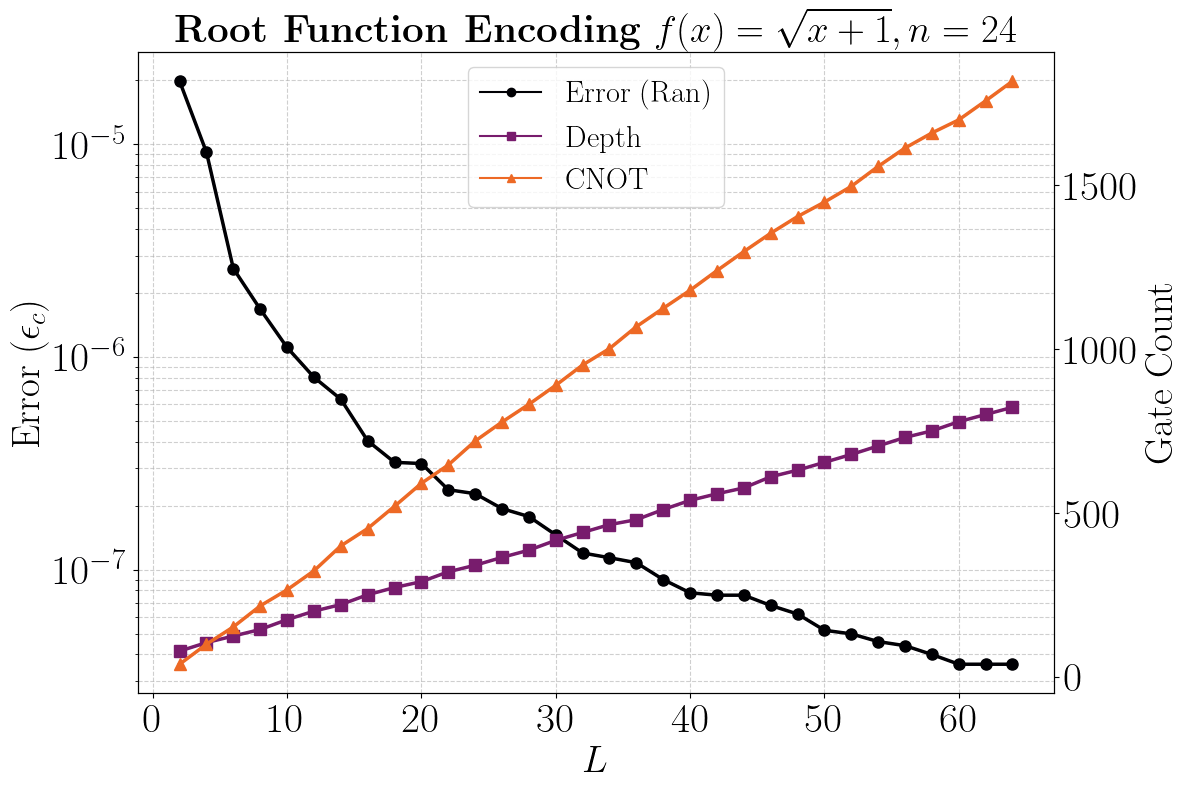

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
root_L = [
    2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
    22, 24, 26, 28, 30, 32, 34, 36, 38, 40,
    42, 44, 46, 48, 50, 52, 54, 56, 58, 60,
    62, 64
]

root_F = [
    0.999990097, 0.999995414, 0.999998696, 0.99999916, 0.999999445,
    0.999999598, 0.999999683, 0.999999798, 0.99999984, 0.999999842,
    0.999999881, 0.999999886, 0.999999903, 0.999999911, 0.999999927,
    0.99999994, 0.999999943, 0.999999946, 0.999999955, 0.999999961,
    0.999999962, 0.999999962, 0.999999966, 0.999999969, 0.999999974,
    0.999999975, 0.999999977, 0.999999978, 0.99999998, 0.999999982,
    0.999999982, 0.999999982
]

root_error = np.ones(len(root_F)) - np.power(root_F, 2)

root_D = [
    79, 105, 125, 145, 175, 201, 221, 251, 273, 291,
    321, 341, 365, 387, 417, 441, 465, 480, 511, 539,
    559, 577, 611, 631, 655, 679, 705, 731, 751, 779,
    801, 823
]

root_CN = [
    39, 100, 153, 217, 266, 324, 400, 453, 521, 591,
    647, 720, 778, 832, 890, 952, 1002, 1069, 1125, 1180,
    1240, 1298, 1354, 1405, 1449, 1497, 1558, 1614, 1660, 1700,
    1758, 1818
]

# Configure Matplotlib to use LaTeX for all text and larger font sizes
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 30,
    "axes.titlesize": 30,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "legend.fontsize": 24,
    "legend.title_fontsize": 24,
})

# Create the inferno colormap
cmap = plt.get_cmap('inferno')
num_lines = 3
colors = [cmap(i / num_lines) for i in range(num_lines)]

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot root_error on primary y-axis (log scale)
ax1.set_xlabel(r'$L$', fontsize=28,weight='bold')
ax1.set_ylabel(r'Error ($\epsilon_c)$', fontsize=28,weight='bold')
error_plot = ax1.plot(root_L, root_error, marker='o', linestyle='-', color=colors[0], label=r'Error (Ran)')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.grid(True, which="both", ls="--", alpha=0.6)

# Create a secondary y-axis for root_D and root_CN
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot root_D and root_CN on the secondary y-axis
depth_plot = ax2.plot(root_L, root_D, marker='s', linestyle='-', color=colors[1], label='Depth')
cnot_plot = ax2.plot(root_L, root_CN, marker='^', linestyle='-', color=colors[2], label='CNOT')
ax2.set_ylabel(r'Gate Count', color='black', fontsize=28,weight='bold')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines = error_plot + depth_plot + cnot_plot
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=22)

# Define line widths and marker sizes
line_width = 2.5
marker_size = 8

# Plot root_error with enhanced line width and marker size
error_plot = ax1.plot(
    root_L, root_error, 
    marker='o', linestyle='-', 
    color=colors[0], 
    label=r'Error (Ran)',
    linewidth=line_width, 
    markersize=marker_size
)

# Plot root_D with enhanced line width and marker size
depth_plot = ax2.plot(
    root_L, root_D, 
    marker='s', linestyle='-', 
    color=colors[1], 
    label='Depth',
    linewidth=line_width, 
    markersize=marker_size
)

# Plot root_CN with enhanced line width and marker size
cnot_plot = ax2.plot(
    root_L, root_CN, 
    marker='^', linestyle='-', 
    color=colors[2], 
    label='CNOT',
    linewidth=line_width, 
    markersize=marker_size
)

# Set plot title
plt.title(r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$', fontsize=28, weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure (modify the path as needed)
plt.savefig(
    r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\analytic_root_plot.pdf",  # Change the filename and path as desired
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    format ='pdf'
)

# Display the plot
plt.show()


In [ ]:
plot_func(
    root_L,
    root_F,
    root_D,
    root_CN,
    title=r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\analytic_root_plot.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1 = 'upper center'
)

Make figure generation a function:

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def plot_func(
    root_L,
    root_F,
    root_D,
    root_CN,
    title=r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path="analytic_root_plot.png",
    dpi=300,
    transparent=True,
    bbox_inches='tight',
    loc1='lower right'
):
    """
    Plots the Root Function Encoding with error and gate counts on dual y-axes.

    Parameters:
    - root_L (list or array-like): The x-axis values.
    - root_F (list or array-like): Values to compute the error.
    - root_D (list or array-like): Depth gate counts.
    - root_CN (list or array-like): CNOT gate counts.
    - title (str): The title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel_primary (str): Label for the primary y-axis (log scale).
    - ylabel_secondary (str): Label for the secondary y-axis.
    - save_path (str): File path to save the plot image.
    - dpi (int): Resolution of the saved figure.
    - transparent (bool): Whether the background of the saved figure is transparent.
    - bbox_inches (str): Bounding box in inches.
    """
    
    # Calculate the error
    root_error = np.ones(len(root_F)) - np.power(root_F, 2)
    

    
    # Create the inferno colormap
    cmap = plt.get_cmap('inferno')
    num_lines = 3
    colors = [cmap(i / num_lines) for i in range(num_lines)]
    
    # Create the figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    # Plot root_error on primary y-axis (log scale)
    ax1.set_xlabel(xlabel, fontsize=28)
    ax1.set_ylabel(ylabel_primary, fontsize=28)
    error_plot, = ax1.plot(root_L, root_error, marker='o', linestyle='-', color=colors[0], label=r'Ran')
    ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor=colors[0])
    ax1.grid(True, which="both", ls="--", alpha=0.6)
    
    # Create a secondary y-axis for root_D and root_CN
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    # Plot root_D and root_CN on the secondary y-axis
    depth_plot, = ax2.plot(root_L, root_D, marker='s', linestyle='-', color=colors[1], label='Depth')
    cnot_plot, = ax2.plot(root_L, root_CN, marker='^', linestyle='-', color=colors[2], label='CNOT')
    ax2.set_ylabel(ylabel_secondary, color='black', fontsize=28)
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Combine legends from both axes
    lines = [error_plot, depth_plot, cnot_plot]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc=loc1, fontsize=22)
    
    # Set plot title
    plt.title(title, fontsize=28)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(
        save_path,
        dpi=dpi,
        transparent=transparent,
        bbox_inches=bbox_inches
    )
    
    # Display the plot
    plt.show()


In [73]:
import numpy as np
import matplotlib.pyplot as plt

def plot_func(
    root_L,
    root_F,
    root_D,
    root_CN,
    title=r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path="analytic_root_plot.pdf",  # Changed default to PDF
    dpi=600,                             # Increased DPI for better quality
    transparent=False,                   # Set to False for white background
    bbox_inches='tight',
    loc1='upper center'                  # Changed default legend location for better visibility
):
    """
    Plots the Root Function Encoding with error and gate counts on dual y-axes.

    Parameters:
    - root_L (list or array-like): The x-axis values.
    - root_F (list or array-like): Values to compute the error.
    - root_D (list or array-like): Depth gate counts.
    - root_CN (list or array-like): CNOT gate counts.
    - title (str): The title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel_primary (str): Label for the primary y-axis (log scale).
    - ylabel_secondary (str): Label for the secondary y-axis.
    - save_path (str): File path to save the plot image. Default is PDF for better quality in LaTeX.
    - dpi (int): Resolution of the saved figure. Increased for higher quality.
    - transparent (bool): Whether the background of the saved figure is transparent. Set to False for white background.
    - bbox_inches (str): Bounding box in inches.
    - loc1 (str): Location of the combined legend.
    """
    
    # Calculate the error
    root_error = np.ones(len(root_F)) - np.power(root_F, 2)
    
    # Configure Matplotlib to use LaTeX for all text and larger font sizes
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "axes.labelsize": 30,
        "axes.titlesize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        "legend.fontsize": 22,
        "legend.title_fontsize": 22,
    })
    
    # Use a brighter, colorblind-friendly palette
    cmap = plt.get_cmap('inferno') 
    num_lines = 3
    colors = [cmap(i / num_lines) for i in range(num_lines)]
    
    # Define line widths and marker sizes
    line_width = 2.5
    marker_size = 8
    
    # Create the figure and primary axis with a white background
    fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='white')
    
    # Plot root_error on primary y-axis (log scale) with enhanced styles
    ax1.set_xlabel(xlabel, fontsize=28, weight='bold')
    ax1.set_ylabel(ylabel_primary, fontsize=28, weight='bold')
    error_plot, = ax1.plot(
        root_L, root_error, 
        marker='o', linestyle='-', 
        color=colors[0], 
        label=r'Error (Ran)',
        linewidth=line_width, 
        markersize=marker_size
    )
    ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor=colors[0])
    ax1.grid(True, which="both", ls="--", alpha=0.6, color='gray')  # Set grid color to gray for better contrast
    
    # Create a secondary y-axis for root_D and root_CN
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    # Plot root_D and root_CN on the secondary y-axis with enhanced styles
    depth_plot, = ax2.plot(
        root_L, root_D, 
        marker='s', linestyle='-', 
        color=colors[1], 
        label='Depth',
        linewidth=line_width, 
        markersize=marker_size
    )
    cnot_plot, = ax2.plot(
        root_L, root_CN, 
        marker='^', linestyle='-', 
        color=colors[2], 
        label='CNOT',
        linewidth=line_width, 
        markersize=marker_size
    )
    ax2.set_ylabel(ylabel_secondary, color='black', fontsize=28, weight='bold')
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Combine legends from both axes and place it optimally
    lines = [error_plot, depth_plot, cnot_plot]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc=loc1, fontsize=22, frameon=True)
    
    # Set plot title
    plt.title(title, fontsize=28, weight='bold')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Save the figure as a PDF for better quality in LaTeX
    plt.savefig(
        save_path,
        format='pdf' if save_path.lower().endswith('.pdf') else 'png',
        dpi=dpi,
        transparent=transparent,
        bbox_inches=bbox_inches
    )
    
    # Display the plot
    plt.show()


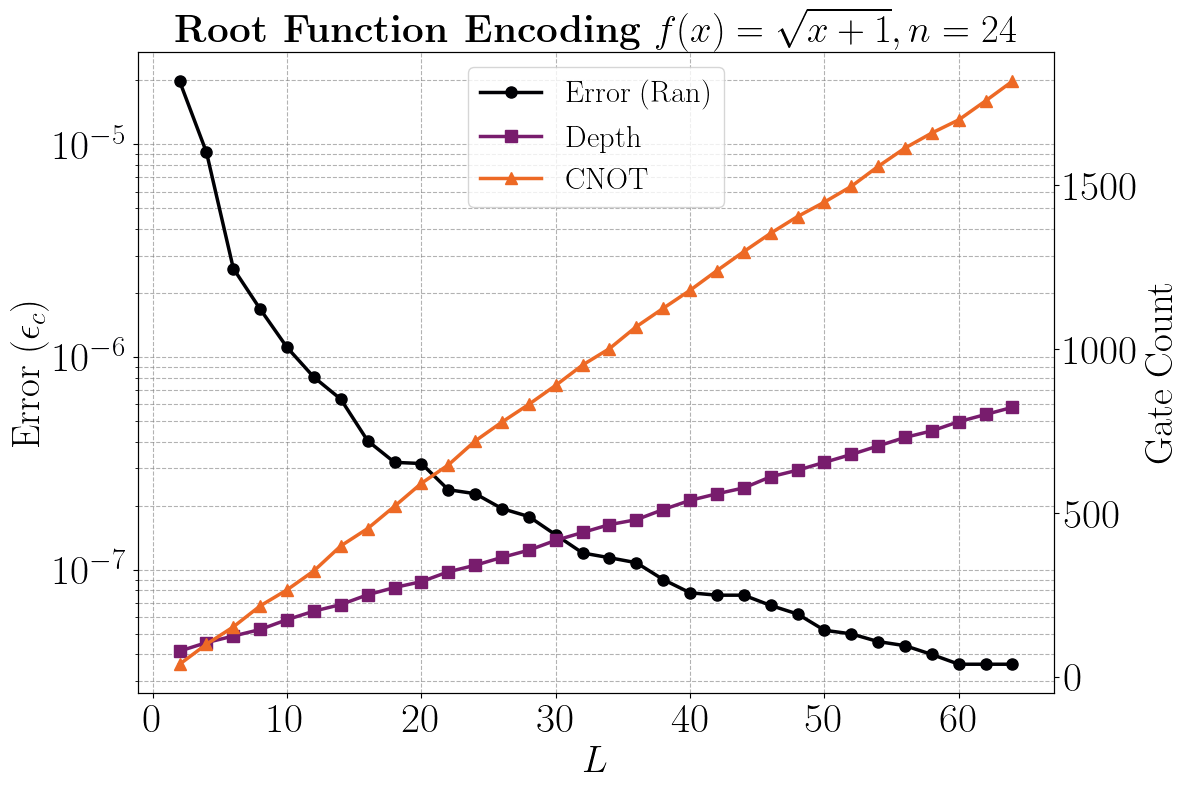

In [74]:
plot_func(
    root_L,
    root_F,
    root_D,
    root_CN,
    title=r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\analytic_root_plot.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1 = 'upper center'
)

Gaussian data

In [19]:
new_data = """
L   Fidelity    Depth
2   0.999787978    95
4   0.999957123    119
6   0.999990036    141
8   0.999994111    165
10  0.999998633    189
12  0.99999851     211
14  0.999999223    239
16  0.99999851     263
18  0.999999644    291
20  0.999999809    305
22  0.999999872    343
24  0.999999844    361
26  0.999999921    383
28  0.999999936    409
30  0.999999956    437
32  0.999999962    453
34  0.99999997     485
36  0.999999974    507
38  0.999999966    531
40  0.999999981    549
42  0.999999982    579
44  0.999999988    597
46  0.999999988    625
48  0.999999989    651
50  0.99999999     679
52  0.999999991    693
54  0.999999991    727
56  0.999999992    741
58  0.999999992    769
60  0.999999993    793
62  0.999999992    817
64  0.999999993    837
66  0.999999993    853
"""

cn_data = """
46
113
172
246
287
340
432
474
555
619
691
762
816
879
932
977
1045
1129
1169
1201
1284
1342
1385
1449
1502
1527
1606
1636
1699
1730
1793
1848
1904
"""

# Parse the new data into lists
lines = new_data.strip().split('\n')
header = lines[0].split()
new_L = []
new_Fidelity = []
new_Depth = []

new_CN = [int(value.strip()) for value in cn_data.strip().split('\n')]


for line in lines[1:]:
    values = line.strip().split()
    new_L.append(int(values[0]))
    new_Fidelity.append(float(values[1]))
    new_Depth.append(int(values[2]))

new_error = 1 - np.power(new_Fidelity, 2)

Plot Gaussian data

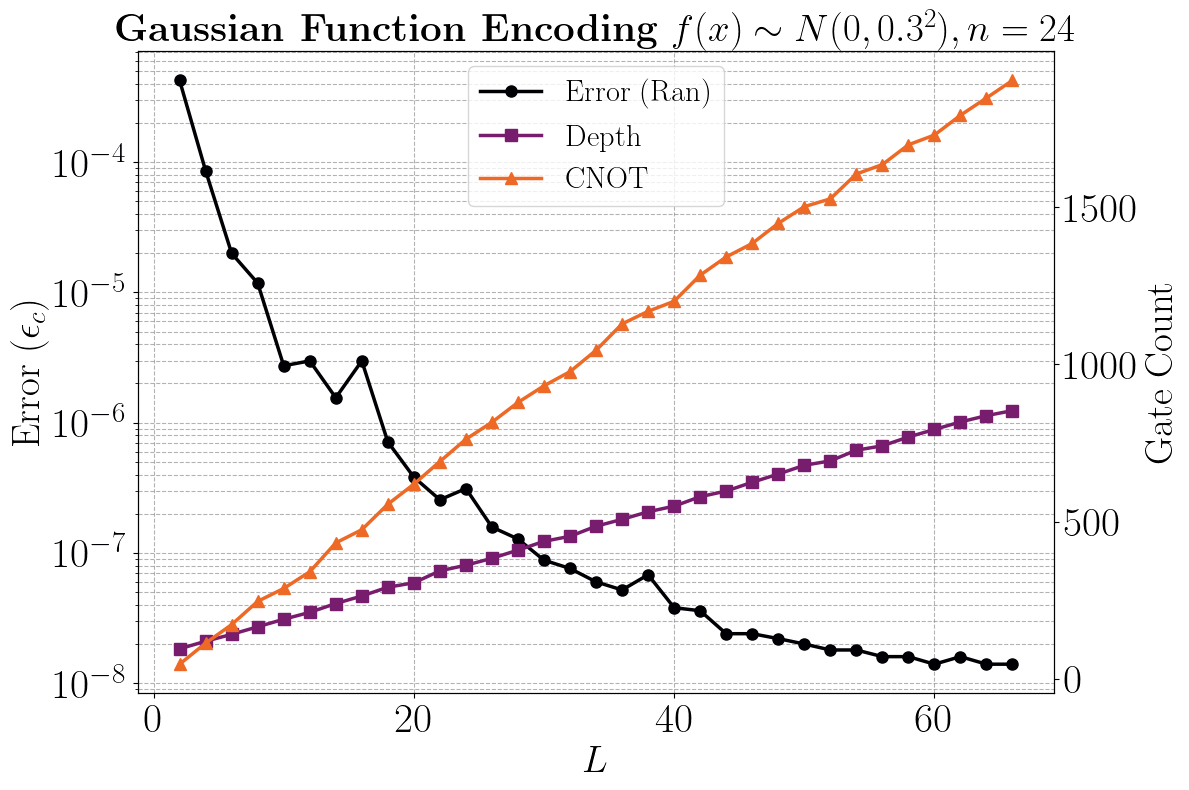

In [24]:
plot_func(
    new_L,
    new_Fidelity,
    new_Depth,
    new_CN,
    title=r'\textbf{Gaussian Function Encoding} $f(x)\sim N(0,0.3^2), n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\analytic_gaussian.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1 = 'upper center'
)

Updated plot ability

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_func(
    root_L,
    root_F,
    root_D,
    root_CN,
    root_L2=None,
    root_F2=None,
    title=r'\textbf{Root Function Encoding} $f(x)=\sqrt{x+1}, n = 24$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path="analytic_root_plot.pdf",  # Changed default to PDF
    dpi=600,                             # Increased DPI for better quality
    transparent=False,                   # Set to False for white background
    bbox_inches='tight',
    loc1='upper center',                 # Changed default legend location for better visibility
    y_tick_min_power=-5,
    y_tick_max_power=-1,
    x_ticks=None                         # New parameter to set custom x-axis ticks
):
    """
    Plots the Root Function Encoding with error and gate counts on dual y-axes.
    Optionally plots a second error dataset on the same axes.

    Parameters:
    - root_L (list or array-like): The x-axis values.
    - root_F (list or array-like): Values to compute the error.
    - root_D (list or array-like): Depth gate counts.
    - root_CN (list or array-like): CNOT gate counts.
    - root_L2 (list or array-like, optional): The x-axis values for the second error dataset.
    - root_F2 (list or array-like, optional): Values to compute the error for the second dataset.
    - title (str): The title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel_primary (str): Label for the primary y-axis (log scale).
    - ylabel_secondary (str): Label for the secondary y-axis.
    - save_path (str): File path to save the plot image. Default is PDF for better quality in LaTeX.
    - dpi (int): Resolution of the saved figure. Increased for higher quality.
    - transparent (bool): Whether the background of the saved figure is transparent. Set to False for white background.
    - bbox_inches (str): Bounding box in inches.
    - loc1 (str): Location of the combined legend.
    - y_tick_min_power (int): Minimum power of 10 for y-ticks on the LHS error plot.
    - y_tick_max_power (int): Maximum power of 10 for y-ticks on the LHS error plot.
    - x_ticks (list or array-like, optional): Custom ticks for the x-axis.
    """

    # Calculate the error for the first dataset
    root_error = np.ones(len(root_F)) - np.power(root_F, 2)

    # Handle the case where all error values are zero
    if np.all(root_error == 0):
        root_error = np.full(len(root_L), 1e-16)

    # Calculate the error for the second dataset if provided
    if root_F2 is not None and root_L2 is not None:
        root_error2 = np.ones(len(root_F2)) - np.power(root_F2, 2)
        if np.all(root_error2 == 0):
            root_error2 = np.full(len(root_L2), 1e-16)

    # Configure Matplotlib to use LaTeX for all text and larger font sizes
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "axes.labelsize": 30,
        "axes.titlesize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        "legend.fontsize": 22,
        "legend.title_fontsize": 22,
    })

    # Use the inferno colormap
    # Adjust num_lines based on whether the second dataset is provided
    num_lines = 4
    if root_L2 is not None and root_F2 is not None:
        num_lines += 1  # Additional line for error of the second dataset
    cmap = plt.get_cmap('inferno')
    colors = [cmap(i / num_lines) for i in range(num_lines)]

    # Define line widths and marker sizes
    line_width = 2.5
    marker_size = 8

    # Create the figure and primary axis with a white background
    fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='white')

    # Plot root_error on primary y-axis (log scale) with enhanced styles
    ax1.set_xlabel(xlabel, fontsize=28, weight='bold')
    ax1.set_ylabel(ylabel_primary, fontsize=28, weight='bold')
    error_plot, = ax1.plot(
        root_L, root_error, 
        marker='o', linestyle='-', 
        color=colors[0], 
        label='Error (Ran)',
        linewidth=line_width, 
        markersize=marker_size
    )
    ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor=colors[0])
    ax1.grid(True, which="both", ls="--", alpha=0.6, color='gray')  # Set grid color to gray for better contrast

    # Set y-axis limits and ticks based on specified powers
    y_ticks = [10**i for i in range(y_tick_min_power, y_tick_max_power + 1)]
    ax1.set_yticks(y_ticks)
    ax1.set_ylim([10**y_tick_min_power, 10**y_tick_max_power])

    # Plot the second dataset error if provided
    if root_L2 is not None and root_F2 is not None:
        error_plot2, = ax1.plot(
            root_L2, root_error2, 
            marker='o', linestyle='-', 
            color=colors[1], 
            label='Error (Ran+Opt)',
            linewidth=line_width, 
            markersize=marker_size
        )

    # Set custom x-axis ticks if provided
    if x_ticks is not None:
        ax1.set_xticks(x_ticks)

    # Create a secondary y-axis for root_D and root_CN
    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    # Plot root_D and root_CN on the secondary y-axis with enhanced styles
    depth_plot, = ax2.plot(
        root_L, root_D, 
        marker='s', linestyle='-', 
        color=colors[2], 
        label='Depth',
        linewidth=line_width, 
        markersize=marker_size
    )
    cnot_plot, = ax2.plot(
        root_L, root_CN, 
        marker='^', linestyle='-', 
        color=colors[3], 
        label='CNOT',
        linewidth=line_width, 
        markersize=marker_size
    )
    ax2.set_ylabel(ylabel_secondary, color='black', fontsize=28, weight='bold')
    ax2.tick_params(axis='y', labelcolor='black')

    # Combine legends from both axes
    lines = [error_plot]
    if root_L2 is not None and root_F2 is not None:
        lines.append(error_plot2)
    lines.extend([depth_plot, cnot_plot])
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc=loc1, fontsize=22, frameon=True)

    # Set plot title
    plt.title(title, fontsize=28, weight='bold')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the figure as PDF or PNG based on the file extension
    plt.savefig(
        save_path,
        format='pdf' if save_path.lower().endswith('.pdf') else 'png',
        dpi=dpi,
        transparent=transparent,
        bbox_inches=bbox_inches
    )

    # Display the plot
    plt.show()


n = 16 Random chi=3 MPS

In [26]:
new_data_2 = """
L   Ran         Opt         Depth   params  CN
3   0.840328729 0.983646274 95      933     109
6   0.877199825 0.990069568 137     1914    226
9   0.888118869 0.988166749 175     2940    351
12  0.892316341 0.990366817 213     3909    466
15  0.90041865  0.992573917 253     5082    616
18  0.897857785 0.992770016 285     6000    722
21  0.900678904 0.99339658  321     7146    866
24  0.911630388 0.990404248 365     8259    1006
27  0.912177801 0.990737855 395     9366    1143
"""

# Parse the new data into lists
lines = new_data_2.strip().split('\n')
header = lines[0].split()
data_2_L = []
data_2_Ran = []
data_2_Opt = []
data_2_Depth = []
data_2_params = []
data_2_CN = []

for line in lines[1:]:
    values = line.strip().split()
    data_2_L.append(int(values[0]))
    data_2_Ran.append(float(values[1]))
    data_2_Opt.append(float(values[2]))
    data_2_Depth.append(int(values[3]))
    data_2_params.append(int(values[4]))
    data_2_CN.append(int(values[5]))

# Calculate errors for Ran and Opt
data_2_error_Ran = 1 - np.power(data_2_Ran, 2)
data_2_error_Opt = 1 - np.power(data_2_Opt, 2)


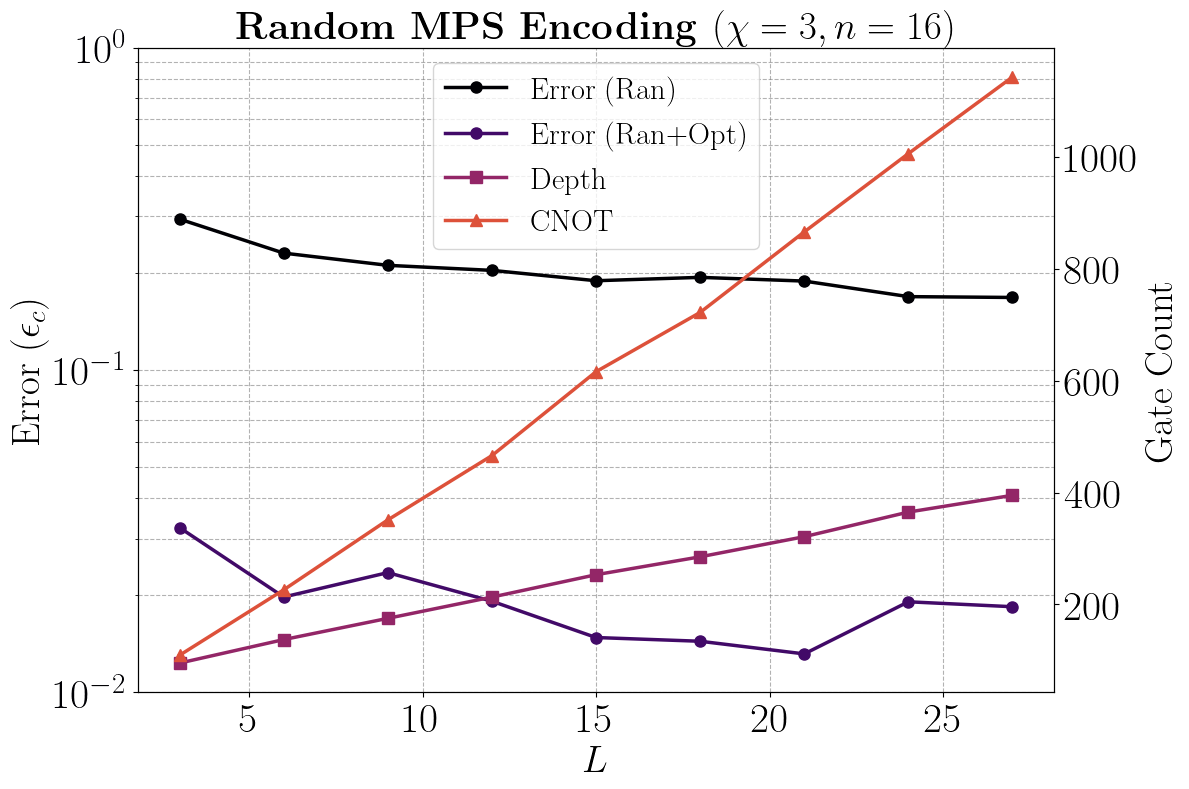

In [29]:
plot_func(
    data_2_L,
    data_2_Ran,
    data_2_Depth,
    data_2_CN,
    root_L2=data_2_L,
    root_F2=data_2_Opt,
    title=r'\textbf{Random MPS Encoding }$(\chi = 3, n=16)$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\random3_16.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='upper center',
    y_tick_max_power=-0,
    y_tick_min_power=-2
)

Cheby(10,4) Data

In [34]:
# Data as a multi-line string
data = """
L    Fidelity    Depth    CNOT    opt
1    0.98101055    77    38    0.981415868
2    0.986552535    89    73    0.994284034
4    0.994110401    109    143    0.998914838
8    0.997681456    159    283    0.999638319
12    0.998799614    211    432    0.999721944
16    0.999295714    261    588    0.999762654
20    0.999598256    307    740    
24    0.999723193    357    895    
28    0.999800883    403    1048    
32    0.999856292    451    1200    
36    0.999882991    499    1351    
40    0.999903534    547    1502    
44    0.999931989    595    1656    
48    0.999938907    643    1809    
52    0.999952878    691    1957    
56    0.999964372    739    2108    
60    0.999969401    787    2258    
64    0.999972816    835    2402    
68    0.999979033    883    2559    
72    0.999981746    931    2708    
76    0.999983509    979    2859    
80    0.999987251    1027    3010    
84    0.999987722    1075    3169    
88    0.999989584    1123    3308    
92    0.999991407    1171    3468    
96    0.999991641    1219    3620    
100    0.999992287    1267    3763    
"""

# Parse the data
lines = data.strip().split('\n')
header = lines[0].split()
L = []
Fidelity = []
Depth = []
CNOT = []
opt = []

for line in lines[1:]:
    values = line.strip().split()
    L.append(int(values[0]))
    Fidelity.append(float(values[1]))
    Depth.append(int(values[2]))
    CNOT.append(int(values[3]))
    if len(values) > 4:
        opt.append(float(values[4]))
    else:
        opt.append(np.nan)  # Use NaN if the 'opt' value is missing

# Convert lists to numpy arrays for easier manipulation
L = np.array(L)
Fidelity = np.array(Fidelity)
Depth = np.array(Depth)
CNOT = np.array(CNOT)
opt = np.array(opt)

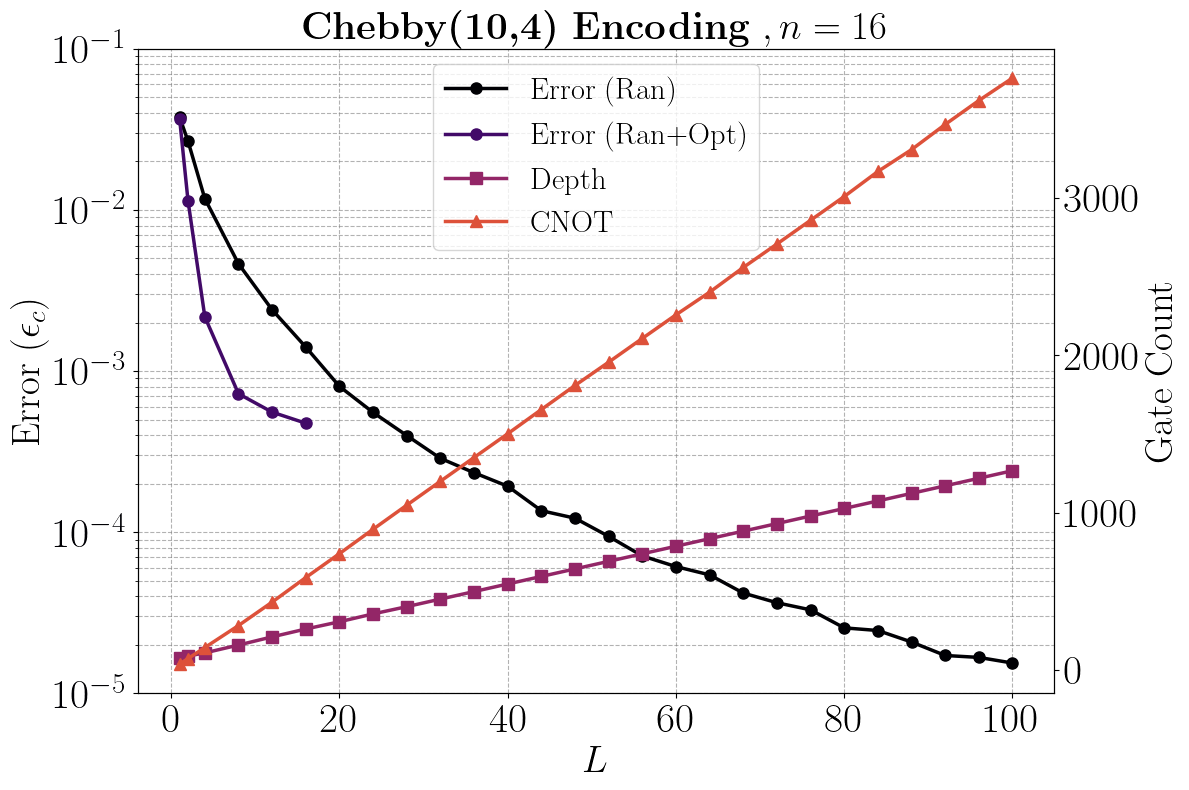

In [35]:
plot_func(
    L,
    Fidelity,
    Depth,
    CNOT,
    root_L2=[1,2,4,8,12,16],
    root_F2=opt[:6],
    title=r'\textbf{Chebby(10,4) Encoding} $, n=16$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\cheby10_4.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='upper center',
    y_tick_max_power=-1,
    y_tick_min_power=-5
)

Linear function

In [36]:
data = """
n    Inf         Depth    total_gates    CNOT
2    10^-16     5       8       2
4    10^-16     13      22      6
6    10^-16     25      42      12
8    10^-16     39      65      19
10   10^-16     51      85      25
12   10^-16     55      93      27
14   10^-16     73      122     36
16   10^-16     71      121     35
18   10^-16     71      123     35
20   10^-16     77      134     38
22   10^-16     73      130     36
24   10^-16     77      138     38
26   10^-16     69      128     34
28   10^-16     71      133     35
"""

# Parse the data
lines = data.strip().split('\n')
header = lines[0].split()
n = []
Inf = []
Depth = []
total_gates = []
CNOT = []

for line in lines[1:]:
    values = line.strip().split()
    n.append(int(values[0]))
    # Convert '10^-16' to float
    if values[1] == '10^-16':
        Inf.append(1e-16)
    else:
        Inf.append(float(values[1]))
    Depth.append(int(values[2]))
    total_gates.append(int(values[3]))
    CNOT.append(int(values[4]))

# Convert lists to numpy arrays for easier manipulation
n = np.array(n)
Inf = np.array(Inf)
Fid = [1.0-1e-17]*len(n)
Depth = np.array(Depth)
total_gates = np.array(total_gates)
#CNOT = np.array(CNOT)

print(len(CNOT))
print(len(Fid))
print(len(Depth))
print(Fid)

print(CNOT)
print(Fid)
print(Depth)

14
14
14
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[2, 6, 12, 19, 25, 27, 36, 35, 35, 38, 36, 38, 34, 35]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[ 5 13 25 39 51 55 73 71 71 77 73 77 69 71]


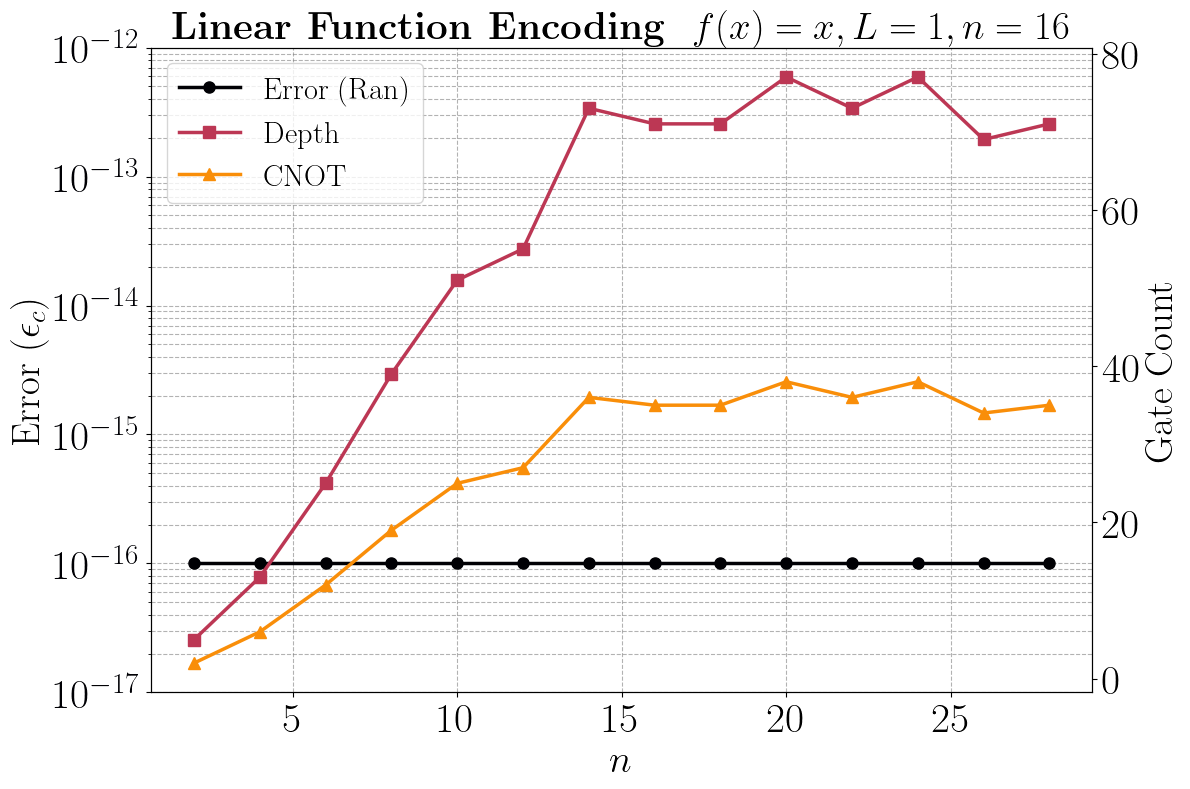

In [37]:
plot_func(
    root_L=n,
    root_F=Fid,
    root_D=Depth,
    root_CN=CNOT,
    root_L2=None,
    root_F2=None,
    title=r'\textbf{Linear Function Encoding } $f(x) = x, L=1, n=16$',
    xlabel=r'$n$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\linear_func.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='upper left',
    y_tick_max_power=-12,
    y_tick_min_power=-17
)

Cheby(10,10) Encoding

In [38]:
import numpy as np

# Data as a multi-line string
data = """
L    Fidelity    Depth    CN    opt
1    0.948431342    75    37    0.950222254
2    0.960638002    87    76    0.973556817
4    0.971823131    111    148    0.993028939
8    0.986535857    161    312    0.998359263
12    0.992223533    213    477    0.999301791
16    0.994845993    265    667    0.999307871
20    0.996461025    311    834    
24    0.997254266    361    1025    
28    0.997766189    409    1205    
32    0.998298461    457    1384    
36    0.998513232    505    1562    
40    0.998876913    553    1742    
44    0.999141188    599    1918    
48    0.999185183    649    2097    
52    0.999327108    697    2271    
56    0.99949147    741    2440    
60    0.999532928    791    2626    
64    0.999611023    841    2810    
68    0.99963013    889    2979    
72    0.999724851    937    3156    
76    0.99974493    985    3333    
80    0.999783893    1031    3502    
84    0.999794761    1079    3681    
88    0.999835622    1127    3842    
92    0.999844907    1175    3968    
96    0.999863868    1223    4160    
100    0.999870888    1271    4336    
"""

# Parse the data
lines = data.strip().split('\n')
header = lines[0].split()
L = []
Fidelity = []
Depth = []
CN = []
opt = []

for line in lines[1:]:
    values = line.strip().split()
    L.append(int(values[0]))
    Fidelity.append(float(values[1]))
    Depth.append(int(values[2]))
    CN.append(int(values[3]))
    if len(values) > 4:
        opt.append(float(values[4]))
    else:
        opt.append(np.nan)  # Use NaN if 'opt' value is missing

# Convert lists to numpy arrays for easier manipulation
L = np.array(L)
Fidelity = np.array(Fidelity)
Depth = np.array(Depth)
CN = np.array(CN)
opt = np.array(opt)


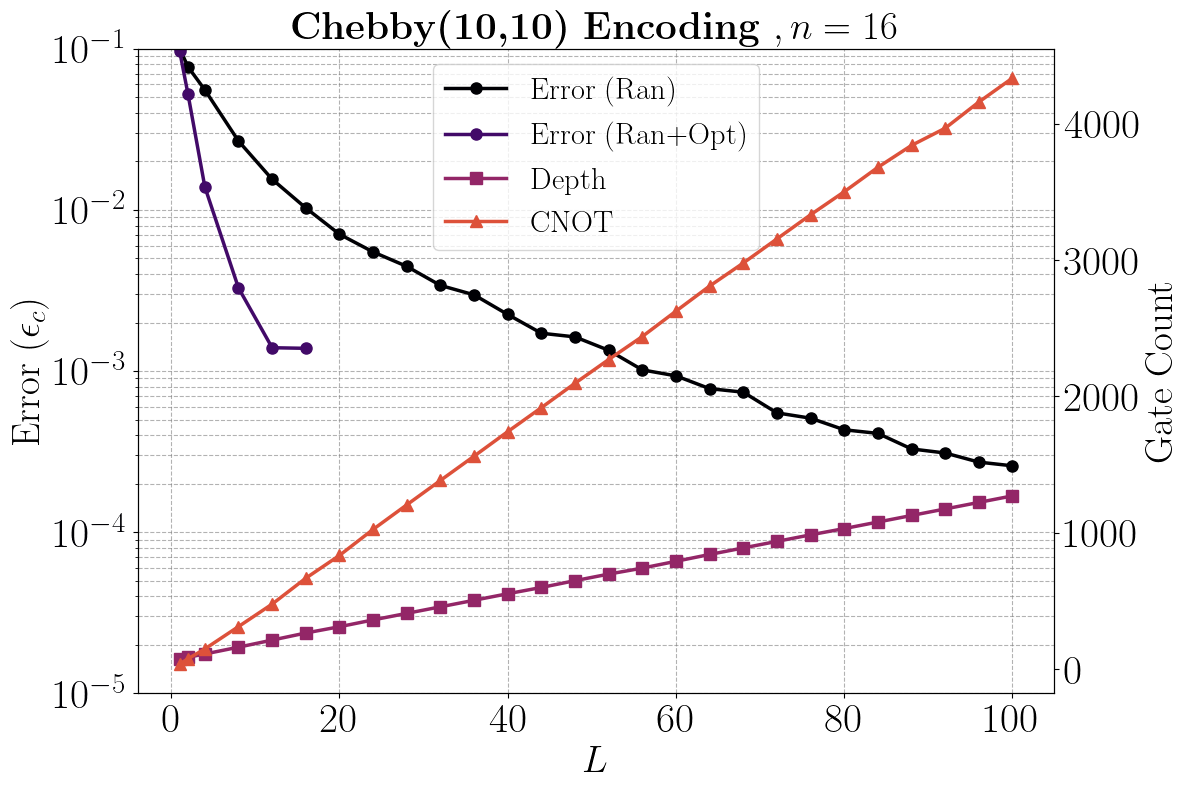

In [39]:
plot_func(
    L,
    Fidelity,
    Depth,
    CN,
    root_L2=[1,2,4,8,12,16],
    root_F2=opt[:6],
    title=r'\textbf{Chebby(10,10) Encoding} $, n=16$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\cheby10_10.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='upper center',
    y_tick_max_power=-1,
    y_tick_min_power=-5
)

Random MPS chi = 3 (8 qubits)

In [40]:
data = """
L    Ran          Gates    Cn    Opt          it    depth
1    0.980837225  59       17    0.980842471  142   73
3    0.991865195  159      49    0.998761475  632   99
5    0.992997637  269      87    0.999689758  620   135
7    0.996821401  353      115   0.999869883  606   159
9    0.995864849  530      174   0.999947131  455   183
11   0.998084845  752      248   0.999970615  491   209
13   0.998801291  695      229   0.999987781  364   233
15   0.998836238  869      287   0.999991119  215   257
17   0.999090195  932      308   0.999994695  339   281
19   0.999237373  1112     368   0.999992549        305
"""

# Parse the data
lines = data.strip().split('\n')
header = lines[0].split()
L = []
Ran = []
Gates = []
Cn = []
Opt = []
it = []
depth = []

for line in lines[1:]:
    values = line.strip().split()
    L.append(int(values[0]))
    Ran.append(float(values[1]))
    Gates.append(int(values[2]))
    Cn.append(int(values[3]))
    Opt.append(float(values[4]))
    # Handle possible missing 'it' values
    if len(values) > 5 and values[5]:
        it_value = values[5]
        it.append(int(it_value))
    else:
        it.append(np.nan)  # Use NaN if 'it' value is missing
    # Depth is always the last value
    depth_value = values[-1]
    depth.append(int(depth_value))

# Convert lists to numpy arrays for easier manipulation
L = np.array(L)
Ran = np.array(Ran)
Gates = np.array(Gates)
Cn = np.array(Cn)
Opt = np.array(Opt)
it = np.array(it)
depth = np.array(depth)

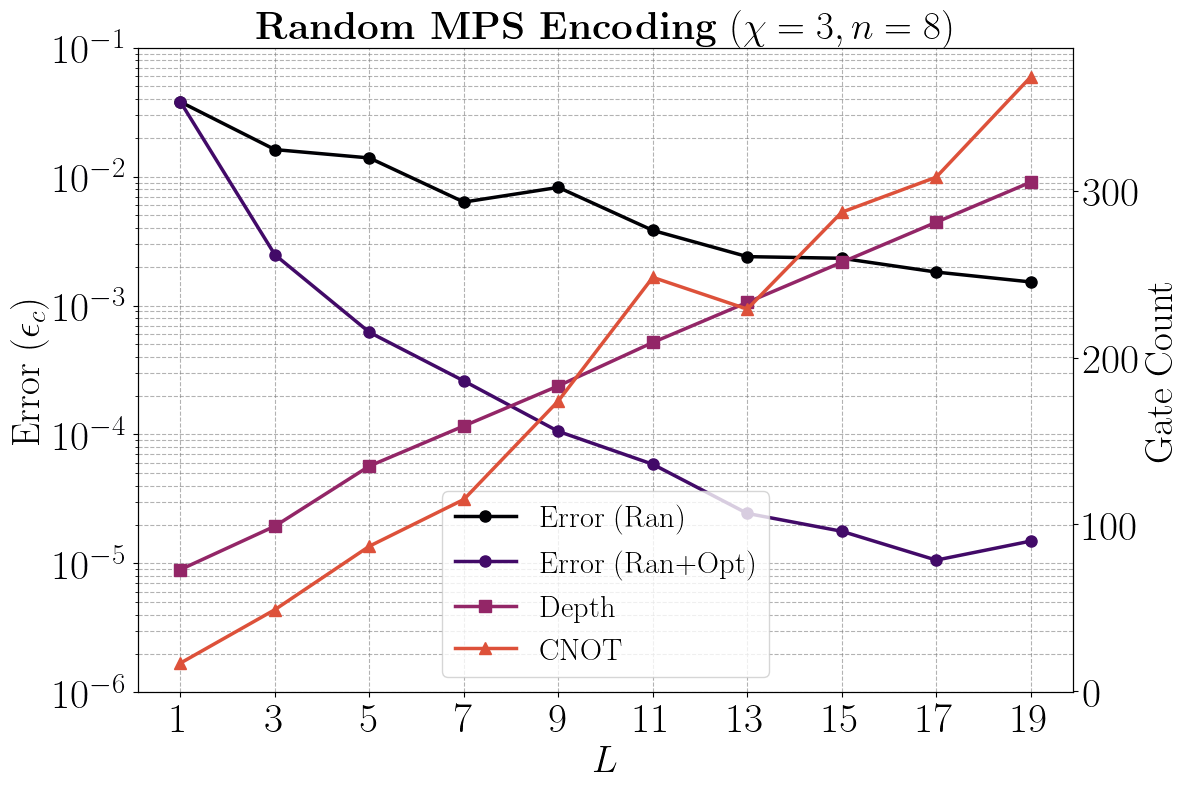

In [44]:
plot_func(
    L,
    Ran,
    depth,
    Cn,
    root_L2=L[:len(Opt)],
    root_F2=Opt,
    title=r'\textbf{Random MPS Encoding} $(\chi=3, n=8)$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\random3_8.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='lower center',
    y_tick_max_power=-1,
    y_tick_min_power=-6,
    x_ticks=L
)

Random chi = 4,5,10 (8 qubits)

In [45]:
import numpy as np

# Block 1 Data (Labelled as 4)
data_4 = """
L    Ran             Gates   CN      Opt             Depth
1    0.768888503     56      16      0.783129513     83
3    0.867025625     164     52      0.987792194     111
5    0.922900175     266     86      0.998814285     137
7    0.931757941     392     128     0.999186456     163
9    0.957546563     482     162     0.999544382     187
11   0.95930931      653     215     0.999966383     209
13   0.970620334     776     256     0.999986708     235
15   0.974377519     869     287     0.999991179     259
17   0.981626928     1019    337     0.999993503     283
19   0.982309715     1088    360     0.999992549     307
"""

# Block 2 Data (Labelled as 5)
data_5 = """
L    Ran             Gates   CN      Opt             Depth
1    0.872353557     59      17      0.874024153     81
3    0.93247899      167     53      0.99285531      103
5    0.949316427     260     84      0.998005152     127
7    0.962585828     375     122     0.999280572     153
9    0.970127896     458     150     0.999630094     179
11   0.9751258       593     195     0.999910593     203
13   0.977136533     743     245     0.999990761     229
15   0.983454824     896     296     0.999992371     253
17   0.984014612     1019    337     0.999993324     281
19   0.990123094     1070    354     0.999994755     301
"""

# Block 3 Data (Labelled as 10)
data_10 = """
L    Ran             Gates   CN      Opt             Depth
1    0.727098933     62      18      0.736869633     77
3    0.83882764      182     58      0.959813476     103
5    0.886262413     263     85      0.987751365     125
7    0.923772593     434     142     0.997477651     159
9    0.932243445     527     173     0.999705255     177
11   0.943010328     629     207     0.999975026     207
13   0.955905414     737     243     0.999986887     231
15   0.964944151     935     309     0.999990523     255
17   0.972737042     1055    349     0.999990404     279
19   0.97901737      1175    389     0.999995291     301
"""

# Function to parse data blocks
def parse_data_block(data_str):
    lines = data_str.strip().split('\n')
    header = lines[0].split()
    L = []
    Ran = []
    Gates = []
    CN = []
    Opt = []
    Depth = []
    
    for line in lines[1:]:
        values = line.strip().split()
        L.append(int(values[0]))
        Ran.append(float(values[1]))
        Gates.append(int(values[2]))
        CN.append(int(values[3]))
        Opt.append(float(values[4]))
        Depth.append(int(values[5]))
    
    # Convert lists to numpy arrays
    L = np.array(L)
    Ran = np.array(Ran)
    Gates = np.array(Gates)
    CN = np.array(CN)
    Opt = np.array(Opt)
    Depth = np.array(Depth)
    
    return L, Ran, Gates, CN, Opt, Depth

# Parse each data block
L_4, Ran_4, Gates_4, CN_4, Opt_4, Depth_4 = parse_data_block(data_4)
L_5, Ran_5, Gates_5, CN_5, Opt_5, Depth_5 = parse_data_block(data_5)
L_10, Ran_10, Gates_10, CN_10, Opt_10, Depth_10 = parse_data_block(data_10)


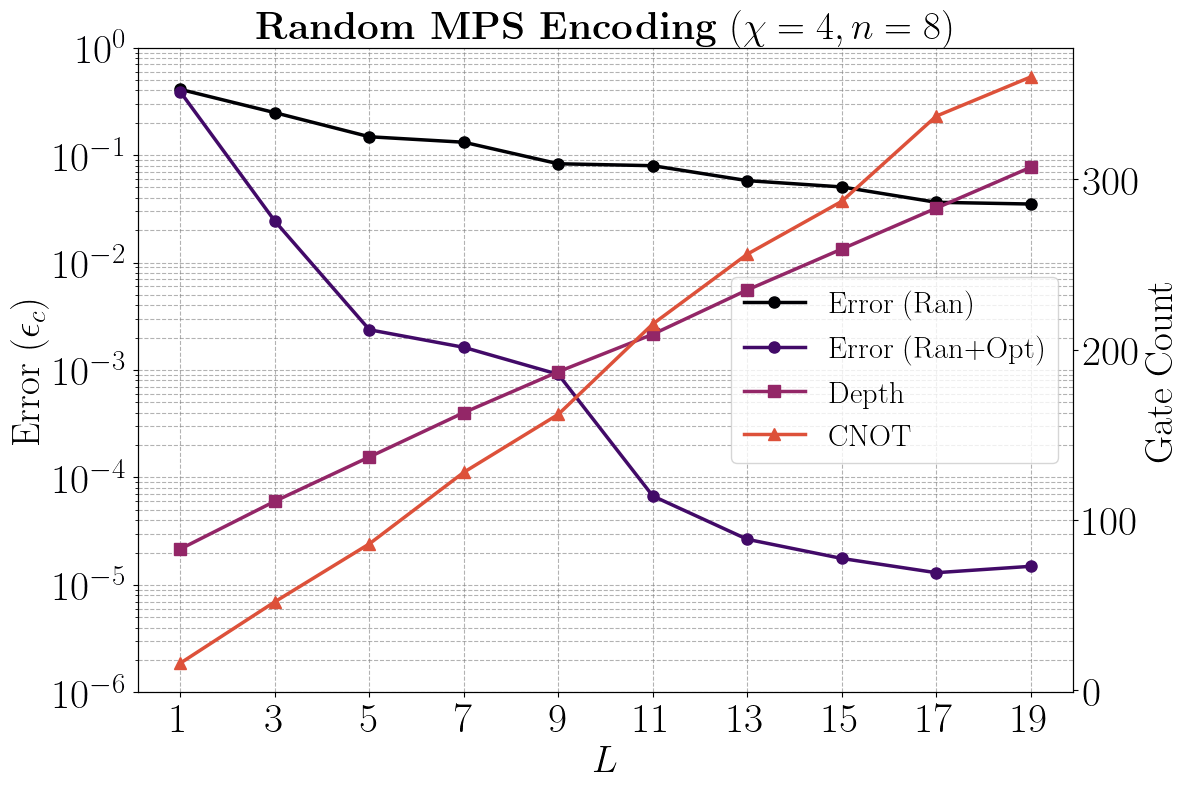

In [46]:
plot_func(
    L_4,
    Ran_4,
    Depth_4,
    CN_4,
    root_L2=L[:len(Opt_4)],
    root_F2=Opt_4,
    title=r'\textbf{Random MPS Encoding} $(\chi=4, n=8)$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\random4_8.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='center right',
    y_tick_max_power=0,
    y_tick_min_power=-6,
    x_ticks=L
)

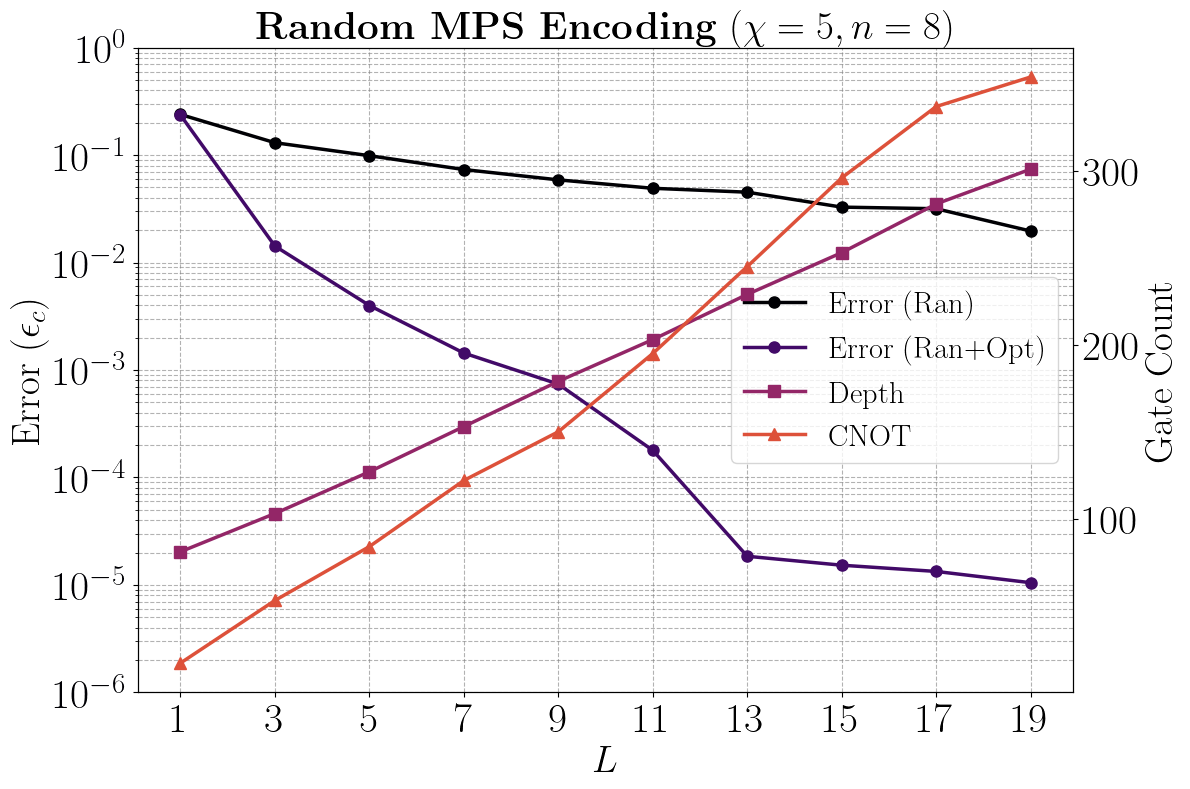

In [68]:
plot_func(
    L_5,
    Ran_5,
    Depth_5,
    CN_5,
    root_L2=L[:len(Opt_5)],
    root_F2=Opt_5,
    title=r'\textbf{Random MPS Encoding} $(\chi=5, n=8)$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\random5_8.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='center right',
    y_tick_max_power=0,
    y_tick_min_power=-6,
    x_ticks=L
)

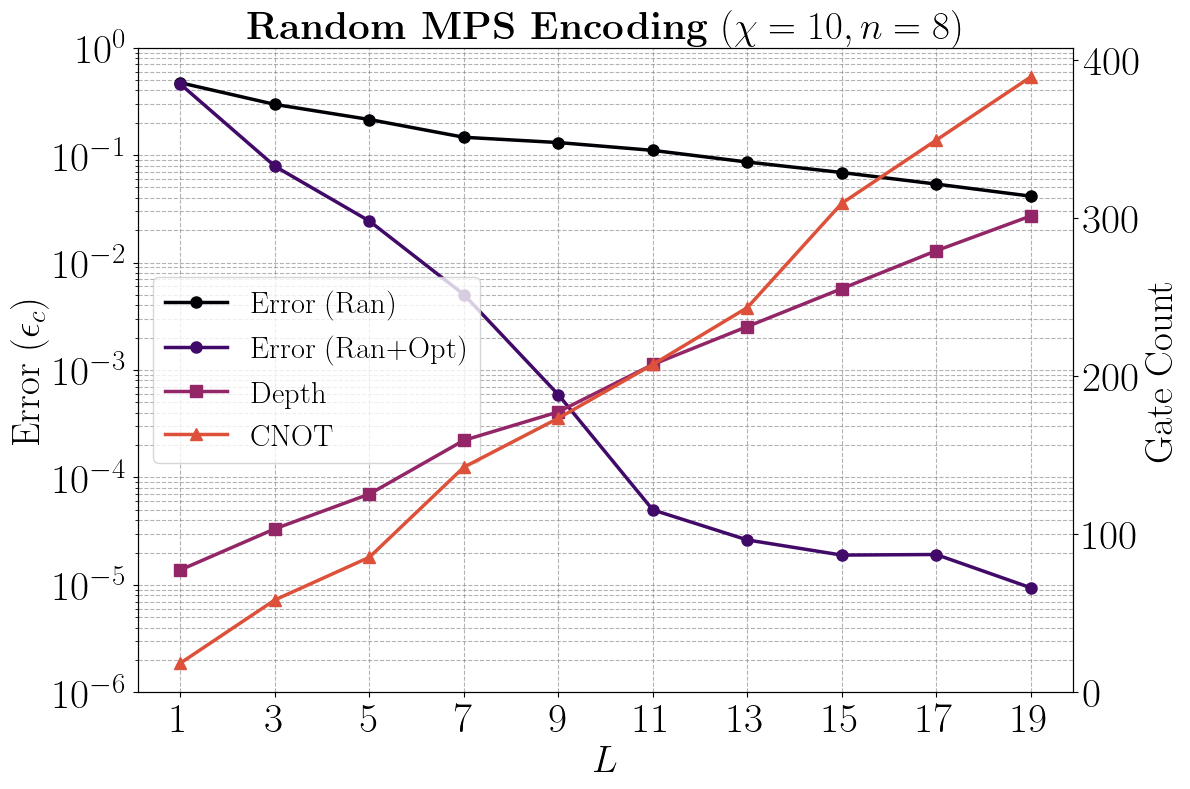

In [51]:
plot_func(
    L_10,
    Ran_10,
    Depth_10,
    CN_10,
    root_L2=L[:len(Opt_10)],
    root_F2=Opt_10,
    title=r'\textbf{Random MPS Encoding} $(\chi=10, n=8)$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\random10_8.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='center left',
    y_tick_max_power=0,
    y_tick_min_power=-6,
    x_ticks=L
)

sin(1/x)

In [52]:
data_sin = """
L    ran           depth    CNOT    opt
12   0.927230179   197      385     0.971424997
18   0.942761004   269      565     0.976750433
24   0.951256156   341      767     0.980784595
30   0.956731558   413      972     0.984725714
"""

# Parse the data
lines = data_sin.strip().split('\n')
header = lines[0].split()
L_sin = []
ran_sin = []
depth_sin = []
CNOT_sin = []
opt_sin = []

for line in lines[1:]:
    values = line.strip().split()
    L_sin.append(int(values[0]))
    ran_sin.append(float(values[1]))
    depth_sin.append(int(values[2]))
    CNOT_sin.append(int(values[3]))
    opt_sin.append(float(values[4]))

# Convert lists to numpy arrays for easier manipulation
L_sin = np.array(L_sin)
ran_sin = np.array(ran_sin)
depth_sin = np.array(depth_sin)
CNOT_sin = np.array(CNOT_sin)
opt_sin = np.array(opt_sin)

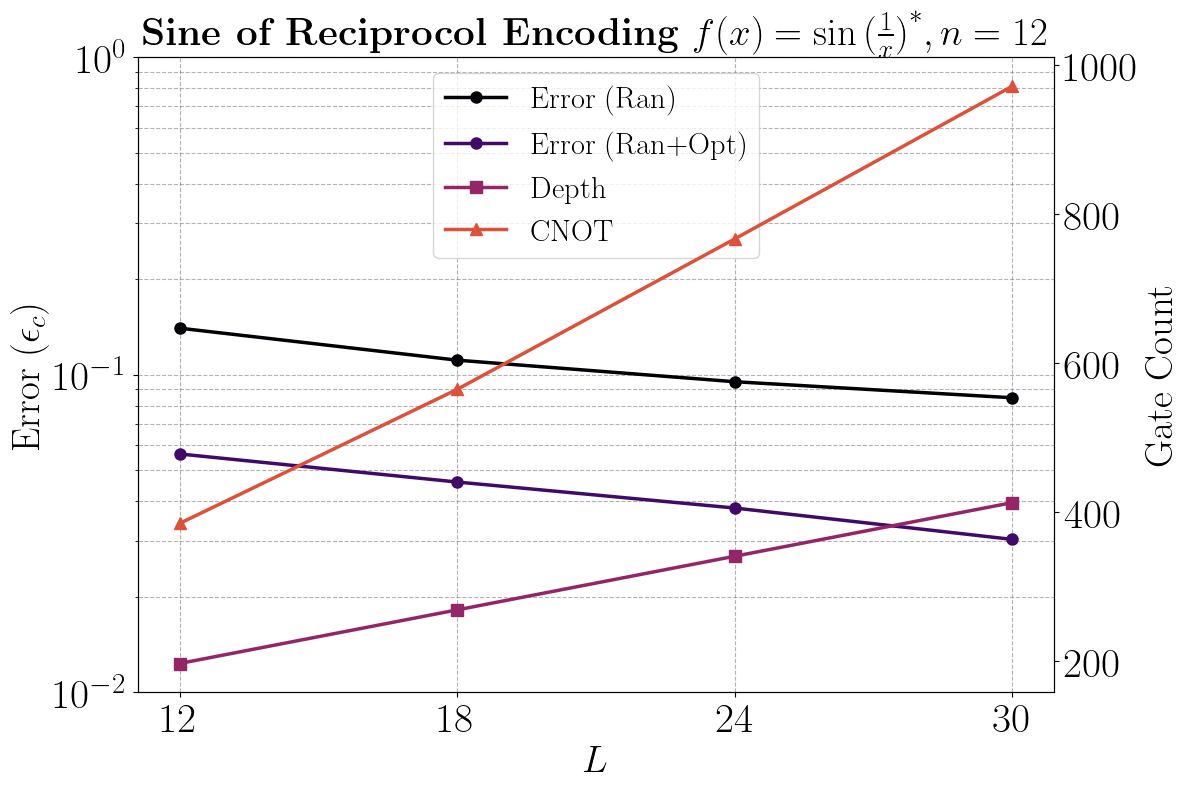

In [53]:
plot_func(
    L_sin,
    ran_sin,
    depth_sin,
    CNOT_sin,
    root_L2=L_sin[:len(opt_sin)],
    root_F2=opt_sin,
    title=r'\textbf{Sine of Reciprocol Encoding} $f(x)=\sin{(\frac{1}{x})}^*, n=12$',
    xlabel=r'$L$',
    ylabel_primary=r'Error ($\epsilon_c)$',
    ylabel_secondary=r'Gate Count',
    save_path=r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\sin_1_x.pdf",
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    loc1='upper center',
    y_tick_max_power=0,
    y_tick_min_power=-2,
    x_ticks = L_sin
)

Melnikov Sin Encoding

In [56]:
import re

# The provided text
data = """
running sin with max rank of  2 for 500  iterations with  5  layers and  12 qubits
final error was: 0.00013616150855033649
minimum error was: 0.00012730276021843956

Great Success

running sin with max rank of  2 for 750  iterations with  5  layers and  12 qubits
final error was: 0.002981971022346208
minimum error was: 0.00017083788993810245

Great Success

running sin with max rank of  2 for 1000  iterations with  5  layers and  12 qubits
final error was: 0.0004939030255378674
minimum error was: 0.00011752710494539187

Great Success

running sin with max rank of  2 for 1250  iterations with  5  layers and  12 qubits
final error was: 0.0005507524662856644
minimum error was: 0.0001104380706352659

Great Success

running sin with max rank of  2 for 1500  iterations with  5  layers and  12 qubits
final error was: 0.0016249476802401297
minimum error was: 0.00014345029875362236

Great Success

running sin with max rank of  2 for 1750  iterations with  5  layers and  12 qubits
final error was: 0.0013066301243909173
minimum error was: 6.442154352914731e-05

Great Success

running sin with max rank of  2 for 2000  iterations with  5  layers and  12 qubits
final error was: 0.00041470916854591255
minimum error was: 0.00011179031127983574

Great Success
"""

# Extract max_iterations and minimum_error using regular expressions
max_iterations = [int(x) for x in re.findall(r'for (\d+)  iterations', data)]
minimum_error = [float(x) for x in re.findall(r'minimum error was: ([\d\.e-]+)', data)]

max_iterations, minimum_error


([500, 750, 1000, 1250, 1500, 1750, 2000],
 [0.00012730276021843956,
  0.00017083788993810245,
  0.00011752710494539187,
  0.0001104380706352659,
  0.00014345029875362236,
  6.442154352914731e-05,
  0.00011179031127983574])

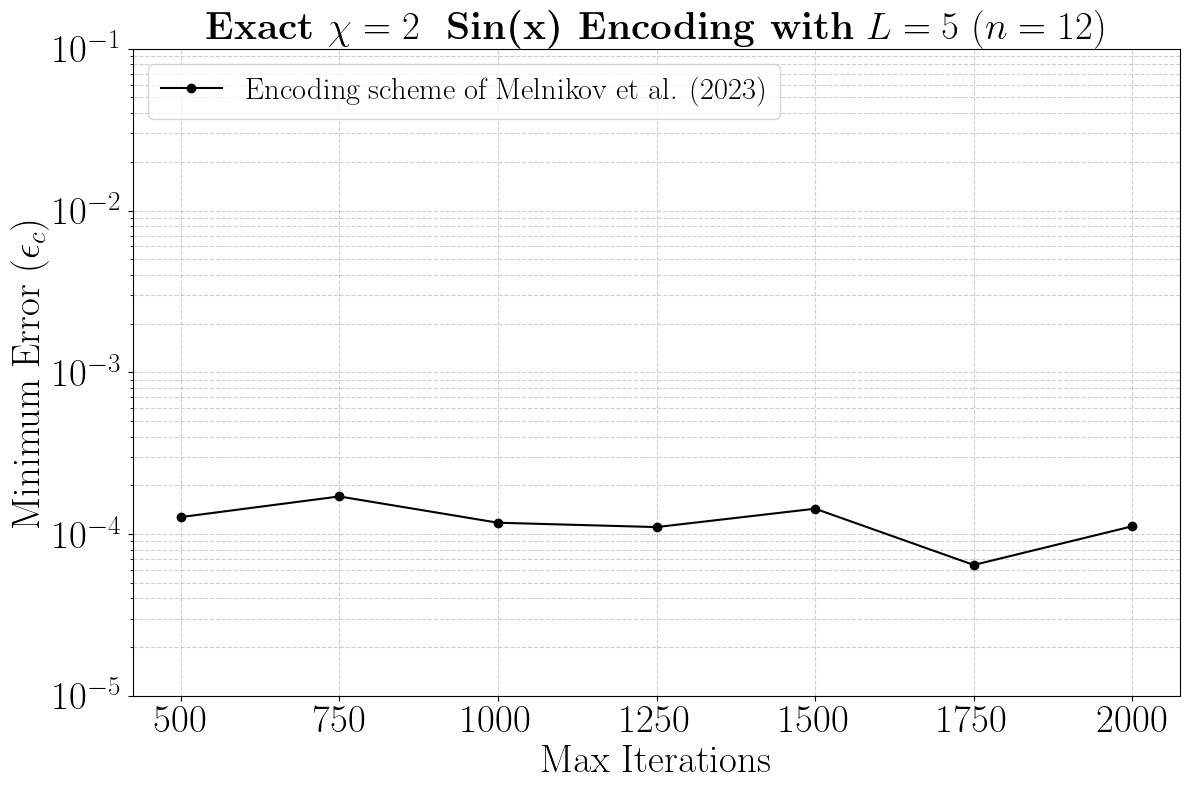

In [193]:
# Configure Matplotlib to use LaTeX for all text and larger font sizes
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 28,
    "axes.titlesize": 28,
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "legend.fontsize": 22,
    "legend.title_fontsize": 22,
})

# Create the inferno colormap
cmap = plt.get_cmap('inferno')
color = cmap(0.0)  # Start with the first color in the colormap

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot minimum_error vs max_iterations
error_plot, = ax.plot(
    max_iterations,
    minimum_error,
    marker='o',
    linestyle='-',
    color=color,
    label='Encoding scheme of Melnikov et al. (2023)'
)

# Set y-axis to log scale
ax.set_yscale('log')

# Set labels
ax.set_xlabel(r'Max Iterations', fontsize=28)
ax.set_ylabel(r'Minimum Error ($\epsilon_c)$', fontsize=28)

# Set grid
ax.grid(True, which="both", ls="--", alpha=0.6)

# Set y-axis limits and ticks (optional, adjust as needed)
y_tick_min_power = -5
y_tick_max_power = -1
y_ticks = [10**i for i in range(y_tick_min_power, y_tick_max_power + 1)]
ax.set_yticks(y_ticks)
ax.set_ylim([10**y_tick_min_power, 10**y_tick_max_power])

# Optionally set custom x-axis ticks
# ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Add legend
ax.legend(loc='upper left', fontsize=22)

# Set plot title
plt.title(r'\textbf{Exact }$\chi = 2$ \textbf{ Sin(x) Encoding with} $L=5$ $(n=12)$', fontsize=28)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(
    r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\melnikov_sin.png",
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

# Display the plot
plt.show()


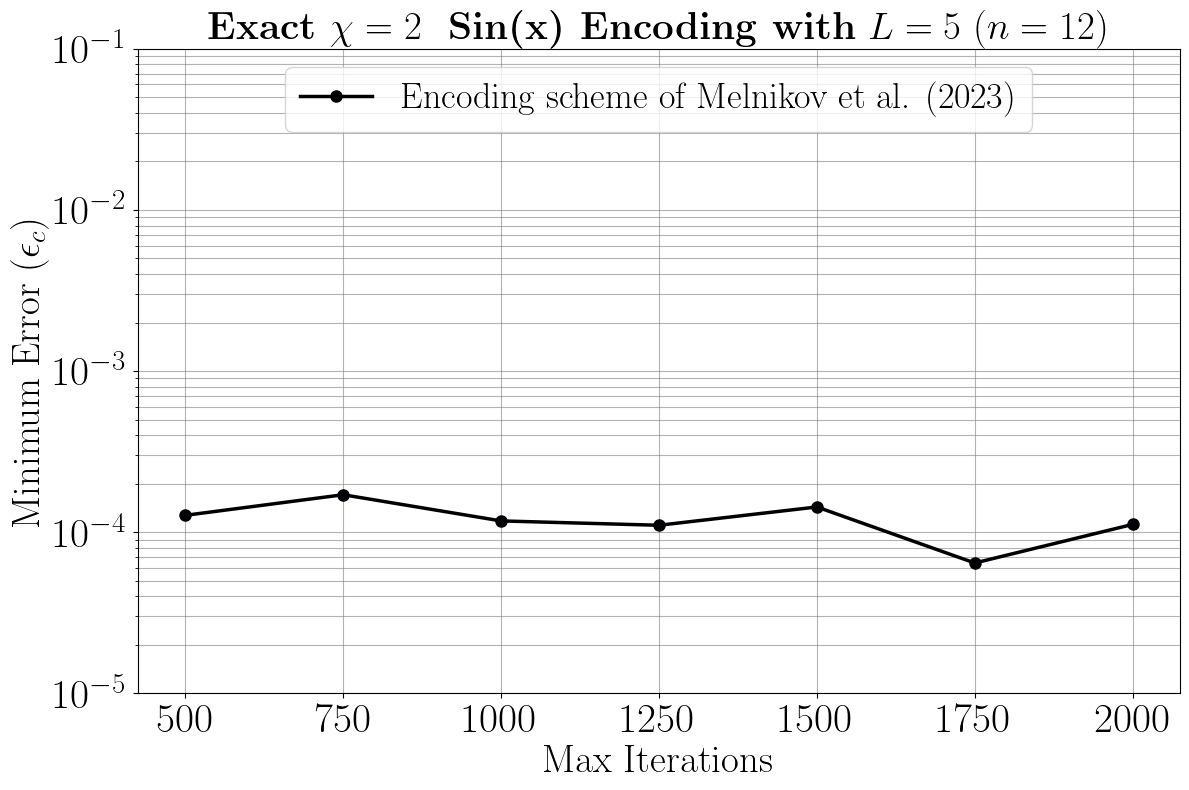

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Replace these with your actual data)


# Configure Matplotlib to use LaTeX for all text and larger font sizes
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 30,
    "axes.titlesize": 30,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "legend.fontsize": 22,
    "legend.title_fontsize": 22,
})

# Use the inferno colormap
cmap = plt.get_cmap('inferno')
color = cmap(0.0)  # Start with the first color in the colormap

# Define line width and marker size for consistency
line_width = 2.5
marker_size = 8

# Create the figure and axis with a white background
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

# Plot minimum_error vs max_iterations with enhanced styles
error_plot, = ax.plot(
    max_iterations,
    minimum_error,
    marker='o',
    linestyle='-',
    color=color,
    label=r'Encoding scheme of Melnikov et al. (2023)',
    linewidth=line_width,
    markersize=marker_size
)

# Set y-axis to log scale
ax.set_yscale('log')

# Set labels with increased font sizes and bold weight
ax.set_xlabel(r'Max Iterations', fontsize=28, weight='bold')
ax.set_ylabel(r'Minimum Error ($\epsilon_c)$', fontsize=28, weight='bold')

# Set grid with subtle gray lines
ax.grid(True, which="both", ls="-", alpha=0.6, color='gray')

# Set y-axis limits and ticks based on specified powers
y_tick_min_power = -5
y_tick_max_power = -1
y_ticks = [10**i for i in range(y_tick_min_power, y_tick_max_power + 1)]
ax.set_yticks(y_ticks)
ax.set_ylim([10**y_tick_min_power, 10**y_tick_max_power])

# Optionally set custom x-axis ticks (Uncomment and modify if needed)
# ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Add legend with optimized placement and no frame
ax.legend(loc='upper center', fontsize=26, frameon=True)

# Set plot title with increased font size and bold weight
plt.title(r'\textbf{Exact }$\chi = 2$ \textbf{ Sin(x) Encoding with} $L=5$ $(n=12)$', fontsize=28, weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as PDF or PNG based on the file extension in save_path
save_path = r"C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Benchmarking Figures\melnikov_sin.pdf"  # Changed to PDF for better quality

plt.savefig(
    save_path,
    format='pdf' if save_path.lower().endswith('.pdf') else 'png',
    dpi=600,                # Increased DPI for higher quality
    transparent=False,      # Set to False for white background
    bbox_inches='tight'
)

# Display the plot
plt.show()
